In [1]:
import pandas as pd
import numpy as np # 행렬 연산 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split # 사이킷 런은 전통적인 머신러닝 라이브러리
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
df = pd.read_csv("C:/ai/car.data", dtype={'ColumnName': str})
df.columns = ['buying', 'maint', 'doors', 'persons','lug_boot','safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [6]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

Text(0.5, 1.0, 'class')

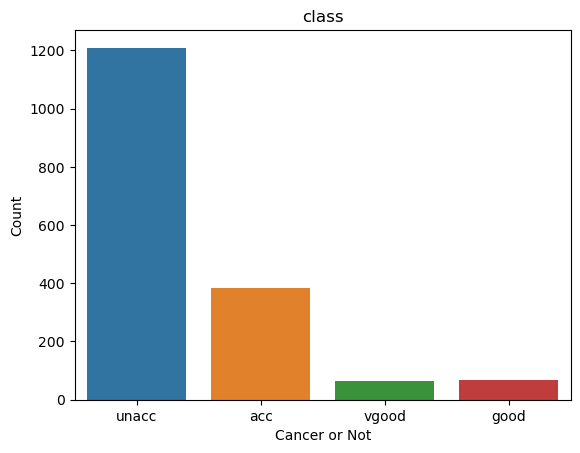

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("class")

In [8]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [39]:
# 레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder
label=LabelEncoder()
df['class']=label.fit_transform(df['class'])
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])
df['persons'] = label.fit_transform(df['persons'])
df['doors'] = label.fit_transform(df['doors'])




df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [40]:
X=df.drop('class',axis=1)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [41]:
y=df['class']
y.value_counts()

class
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [42]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [43]:
Y = pd.get_dummies(y).values

In [44]:
X = X.values

In [45]:
X

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]], dtype=int64)

In [46]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: class, Length: 1727, dtype: int64

In [47]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0) 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [50]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6944444444444444
[[ 24   0  68   4]
 [  3   0  15   0]
 [ 21   0 275   2]
 [  7   0  12   1]]


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 이전 코드 이후에 classification_report을 호출하여 사용
print(classification_report(y_test, pred_dt))

# Build a decision tree classifier and predict
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        96
           1       1.00      0.78      0.88        18
           2       0.98      1.00      0.99       298
           3       0.94      0.85      0.89        20

    accuracy                           0.97       432
   macro avg       0.96      0.89      0.92       432
weighted avg       0.97      0.97      0.97       432


--- Decision Tree Classifier ---
0.96759
[[ 90   0   6   0]
 [  3  14   0   1]
 [  1   0 297   0]
 [  3   0   0  17]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        96
           1       1.00      0.78      0.88        18
           2       0.98      1.00      0.99       298
           3       0.94      0.85      0.89        20

    accuracy                           0.97       432
   macro avg       0.96      0.89      0.92       432
weighted avg       0.97      0.97      0.97       432



In [54]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6944444444444444
[[ 24   0  68   4]
 [  3   0  15   0]
 [ 21   0 275   2]
 [  7   0  12   1]]


In [55]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9282407407407407
[[ 87   1   7   1]
 [  5  11   0   2]
 [  6   1 291   0]
 [  8   0   0  12]]


C:\Users\gksru\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9722222222222222
[[ 89   1   6   0]
 [  2  13   0   3]
 [  0   0 298   0]
 [  0   0   0  20]]


In [60]:
df = pd.read_csv("C:/ai/car.data", dtype={'ColumnName': str})
#레이블을 숫자로 변환
df.columns = ['buying', 'maint', 'doors', 'persons','lug_boot','safety', 'class']

from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

df['class']=label.fit_transform(df['class'])
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])
df['persons'] = label.fit_transform(df['persons'])
df['doors'] = label.fit_transform(df['doors'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [61]:
X=df.drop('class',axis=1)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [62]:
y=df['class']

y.value_counts()

class
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [63]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,buying,maint,doors,persons,lug_boot,safety
520,0,3,3,0,0,0
621,0,0,3,0,2,2
1017,2,0,1,2,2,2
1273,2,1,3,0,1,0
924,2,3,2,0,0,2
...,...,...,...,...,...,...
835,0,1,2,2,0,0
1216,2,1,1,0,2,0
1653,1,1,1,0,0,2
559,0,0,0,2,2,0


In [65]:
X_test.shape

(432, 6)

In [66]:
X_train.shape[1]

6

In [67]:
y_train

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False]])

In [68]:
y_train.shape

(1295, 4)

In [81]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam

model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='relu'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(20,activation='relu'))
model.add(Dense(4, activation='softmax'))

#출력 유닛 수는 클래스 수(레이블 수)와 동일하게 설정한다!!!!!!

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy', metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 914 (3.57 KB)

 Trainable params: 914 (3.57 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5691 - loss: 1.0333 - val_accuracy: 0.6944 - val_loss: 0.6745
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7087 - loss: 0.6330 - val_accuracy: 0.7431 - val_loss: 0.5975
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7586 - loss: 0.5405 - val_accuracy: 0.7245 - val_loss: 0.5877
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.5120 - val_accuracy: 0.7639 - val_loss: 0.5244
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4402 - val_accuracy: 0.8056 - val_loss: 0.4518
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8334 - loss: 0.3667 - val_accuracy: 0.8356 - val_loss: 0.3588
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3208 - val_accuracy: 0.8171 - val_loss: 0.3942
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3186 - val_accuracy: 0.8588 - val_loss:

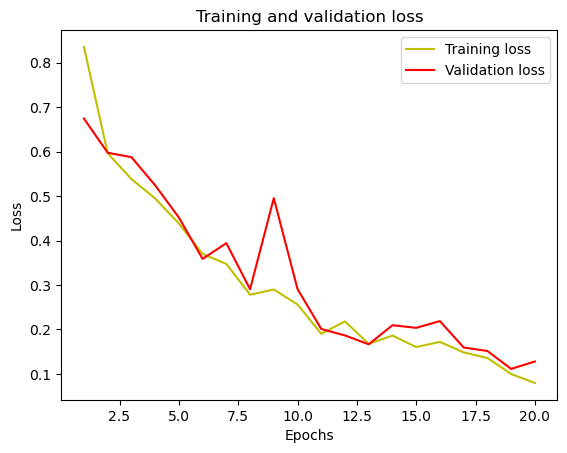

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

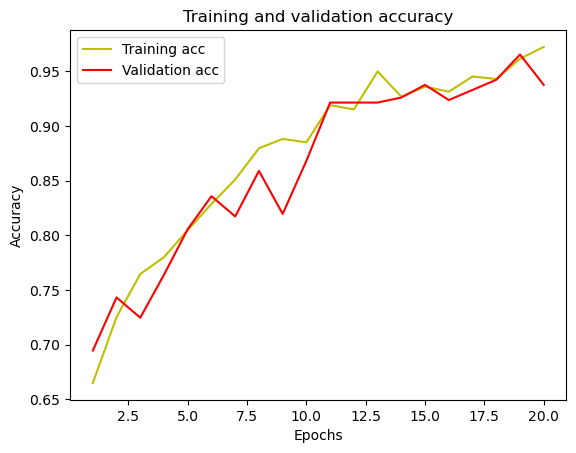

In [84]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        96
           1       1.00      0.61      0.76        18
           2       0.97      0.98      0.98       298
           3       0.75      0.75      0.75        20

    accuracy                           0.94       432
   macro avg       0.90      0.81      0.84       432
weighted avg       0.94      0.94      0.94       432

[[ 86   0  10   0]
 [  2  11   0   5]
 [  5   0 293   0]
 [  5   0   0  15]]
